# Project: Education Career Success.
### In this project, we have decided to establish the target variable, the criterion of 'Career Satisfaction'. First we will use Multiclass Logistic Regression. Then, we'll use Neural Networks. At the end, we'll compare results and decide which one is better. We'll see, this is a very "special" dataset.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Settings of graphics:

In [3]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

### Loading the dataset.

In [4]:
path = '/content/drive/MyDrive/Machine Learning - Proyectos/Proyectos/Project - Education Career Success/education_career_success.csv'

In [5]:
df = pd.read_csv(path)

In [6]:
df.head(10)

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No
5,S00006,24,Male,2.40,1600,631,3.78,Law,2,3,2,2,2,1,68400.0,9,2,Entry,8,Yes
6,S00007,27,Male,2.36,1011,610,3.83,Computer Science,0,1,3,3,3,2,55500.0,7,4,Mid,3,No
7,S00008,20,Male,2.68,1074,240,2.84,Computer Science,1,5,5,5,1,2,38000.0,2,3,Entry,3,No
8,S00009,24,Male,2.84,1201,337,3.31,Business,2,3,0,5,5,2,68900.0,2,2,Entry,2,No
9,S00010,28,Male,3.02,1415,138,2.33,Computer Science,1,5,3,10,2,0,58900.0,4,2,Senior,2,No


In [7]:
df.shape

(5000, 20)

In [8]:
df.columns.values

array(['Student_ID', 'Age', 'Gender', 'High_School_GPA', 'SAT_Score',
       'University_Ranking', 'University_GPA', 'Field_of_Study',
       'Internships_Completed', 'Projects_Completed', 'Certifications',
       'Soft_Skills_Score', 'Networking_Score', 'Job_Offers',
       'Starting_Salary', 'Career_Satisfaction', 'Years_to_Promotion',
       'Current_Job_Level', 'Work_Life_Balance', 'Entrepreneurship'],
      dtype=object)

# General information and statistics

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             5000 non-null   object 
 1   Age                    5000 non-null   int64  
 2   Gender                 5000 non-null   object 
 3   High_School_GPA        5000 non-null   float64
 4   SAT_Score              5000 non-null   int64  
 5   University_Ranking     5000 non-null   int64  
 6   University_GPA         5000 non-null   float64
 7   Field_of_Study         5000 non-null   object 
 8   Internships_Completed  5000 non-null   int64  
 9   Projects_Completed     5000 non-null   int64  
 10  Certifications         5000 non-null   int64  
 11  Soft_Skills_Score      5000 non-null   int64  
 12  Networking_Score       5000 non-null   int64  
 13  Job_Offers             5000 non-null   int64  
 14  Starting_Salary        5000 non-null   float64
 15  Care

In [10]:
print(df.describe())

               Age  High_School_GPA    SAT_Score  University_Ranking  \
count  5000.000000      5000.000000  5000.000000         5000.000000   
mean     23.442200         2.996978  1253.832000          504.335600   
std       3.473712         0.575673   203.228954          291.060011   
min      18.000000         2.000000   900.000000            1.000000   
25%      20.000000         2.500000  1076.000000          256.000000   
50%      23.000000         2.990000  1257.000000          501.500000   
75%      26.000000         3.500000  1432.000000          759.000000   
max      29.000000         4.000000  1600.000000         1000.000000   

       University_GPA  Internships_Completed  Projects_Completed  \
count     5000.000000            5000.000000         5000.000000   
mean         3.020028               1.982200            4.562800   
std          0.576047               1.408219            2.872927   
min          2.000000               0.000000            0.000000   
25%        

In [11]:
print(df.describe(include='all'))

       Student_ID          Age Gender  High_School_GPA    SAT_Score  \
count        5000  5000.000000   5000      5000.000000  5000.000000   
unique       5000          NaN      3              NaN          NaN   
top        S00001          NaN   Male              NaN          NaN   
freq            1          NaN   2458              NaN          NaN   
mean          NaN    23.442200    NaN         2.996978  1253.832000   
std           NaN     3.473712    NaN         0.575673   203.228954   
min           NaN    18.000000    NaN         2.000000   900.000000   
25%           NaN    20.000000    NaN         2.500000  1076.000000   
50%           NaN    23.000000    NaN         2.990000  1257.000000   
75%           NaN    26.000000    NaN         3.500000  1432.000000   
max           NaN    29.000000    NaN         4.000000  1600.000000   

        University_Ranking  University_GPA Field_of_Study  \
count          5000.000000     5000.000000           5000   
unique                 Na

### Variable `Career_Satisfaction` distribution:

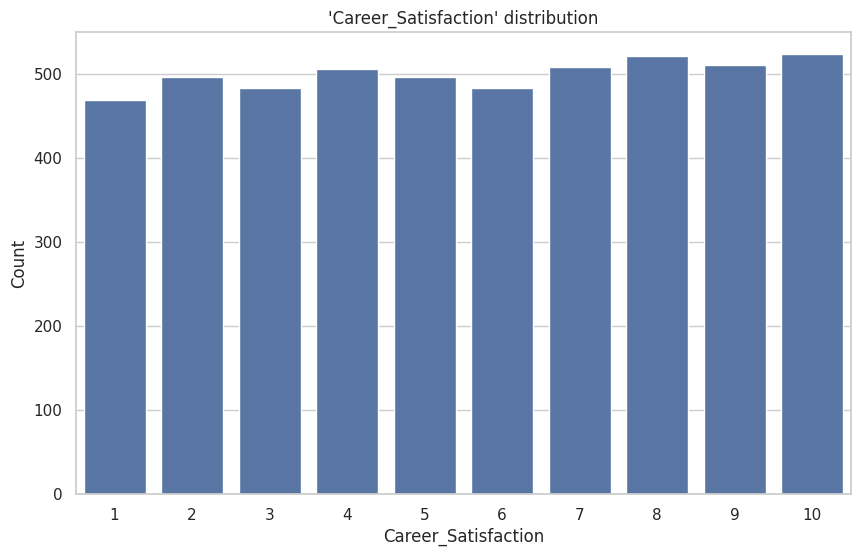

In [12]:
plt.figure()
sns.countplot(x = 'Career_Satisfaction', data = df)
plt.title("'Career_Satisfaction' distribution")
plt.xlabel("Career_Satisfaction")
plt.ylabel("Count")
plt.show()

# Solving problems related to missing values

### NaN overall for each field:

In [13]:
print(df.isnull().sum())

Student_ID               0
Age                      0
Gender                   0
High_School_GPA          0
SAT_Score                0
University_Ranking       0
University_GPA           0
Field_of_Study           0
Internships_Completed    0
Projects_Completed       0
Certifications           0
Soft_Skills_Score        0
Networking_Score         0
Job_Offers               0
Starting_Salary          0
Career_Satisfaction      0
Years_to_Promotion       0
Current_Job_Level        0
Work_Life_Balance        0
Entrepreneurship         0
dtype: int64


# Important note: As we have seen in the previous cell of code, we couldn't find NaN values.

In [14]:
df.duplicated().sum() # Overall of duplicate rows

0

### Indentifying categorical columns to encode:

In [15]:
categorical_cols = ['Gender', 'Field_of_Study', 'Current_Job_Level', 'Entrepreneurship']

### Conversion of categorical variables to dummy variables:

In [16]:
df = pd.get_dummies(df, columns = categorical_cols, drop_first = True)
print("\nDataset shape after conversion", df.shape)


Dataset shape after conversion (5000, 28)


### Conversion of `int` cols to `float` cols:

In [17]:
numeric_int_cols = ['Age', 'SAT_Score', 'University_Ranking',
                    'Internships_Completed', 'Projects_Completed',
                    'Certifications', 'Soft_Skills_Score',
                    'Networking_Score', 'Job_Offers',
                    'Career_Satisfaction', 'Years_to_Promotion',
                    'Work_Life_Balance']

In [18]:
for cat in numeric_int_cols:
    df[cat] = df[cat].astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       5000 non-null   object 
 1   Age                              5000 non-null   float64
 2   High_School_GPA                  5000 non-null   float64
 3   SAT_Score                        5000 non-null   float64
 4   University_Ranking               5000 non-null   float64
 5   University_GPA                   5000 non-null   float64
 6   Internships_Completed            5000 non-null   float64
 7   Projects_Completed               5000 non-null   float64
 8   Certifications                   5000 non-null   float64
 9   Soft_Skills_Score                5000 non-null   float64
 10  Networking_Score                 5000 non-null   float64
 11  Job_Offers                       5000 non-null   float64
 12  Starting_Salary     

### Let's delete `Student_ID` column due to it doesn't provide relevant information.

In [20]:
df = df.drop('Student_ID', axis = 1)

# PCA Analysis

### Data scaling:

In [21]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

### Let´s find out the optimal number of principal components:

In [22]:
for i in range(2, 28):
    pca = PCA(n_components = i)
    data_pca = pca.fit_transform(data_scaled)
    df_pca = pd.DataFrame(data_pca)
    list_pca = df_pca.columns.tolist()
    X = df_pca[list_pca]
    y = df['Career_Satisfaction']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
    model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter = 1000, random_state = 42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model accuracy with {i} principal components: {accuracy * 100:.2f}%")

Model accuracy with 2 principal components: 11.60%
Model accuracy with 3 principal components: 13.90%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Model accuracy with 4 principal components: 13.80%
Model accuracy with 5 principal components: 14.20%
Model accuracy with 6 principal components: 13.90%
Model accuracy with 7 principal components: 14.50%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Model accuracy with 8 principal components: 15.20%
Model accuracy with 9 principal components: 15.80%
Model accuracy with 10 principal components: 16.40%
Model accuracy with 11 principal components: 17.20%
Model accuracy with 12 principal components: 17.30%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Model accuracy with 13 principal components: 17.50%
Model accuracy with 14 principal components: 18.00%
Model accuracy with 15 principal components: 19.20%
Model accuracy with 16 principal components: 20.90%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Model accuracy with 17 principal components: 23.00%
Model accuracy with 18 principal components: 22.20%
Model accuracy with 19 principal components: 26.70%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model accuracy with 20 principal components: 32.20%
Model accuracy with 21 principal components: 33.20%
Model accuracy with 22 principal components: 57.70%
Model accuracy with 23 principal components: 74.30%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model accuracy with 24 principal components: 96.90%
Model accuracy with 25 principal components: 99.30%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model accuracy with 26 principal components: 99.50%
Model accuracy with 27 principal components: 99.30%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### According to this last result, we must choose n = 26.

### Applying PCA for reducing to `n` principal components:

In [23]:
n = 26
pca = PCA(n_components = n)
data_pca = pca.fit_transform(data_scaled)

### Converting to a DataFrame for visualization:

In [24]:
df_pca = pd.DataFrame(data_pca)

In [25]:
print(df_pca.head())

         0         1         2         3         4         5         6   \
0 -0.235926 -0.635955  0.124653  0.035385 -0.325882 -0.056169  0.133474   
1  2.250641  3.413241  1.825075  0.341894  2.199006  1.143422 -1.547502   
2  0.034735  0.591899 -1.290813 -0.822308 -0.008792 -1.699636 -1.724485   
3  1.462582  0.150144  0.807241 -1.025511 -0.549599 -1.667510  2.474149   
4 -0.738841  0.113277 -0.338748  1.831438 -0.281038 -1.328520  1.147553   

         7         8         9   ...        16        17        18        19  \
0  0.577836  1.095183  1.096218  ... -0.552559  1.824851 -0.236465  1.227399   
1  0.152587  1.942913  0.097021  ... -0.180430  1.457768  0.766256 -1.470321   
2 -0.526256 -1.406242  0.472919  ... -0.713772 -0.311664 -0.048383  0.907292   
3 -1.798277 -0.830119 -0.029990  ...  0.997789 -0.180687 -0.502995 -0.241835   
4 -0.343340  0.120246  0.416724  ... -0.006774 -0.308206 -0.330047  2.182992   

         20        21        22        23        24        25  
0  1

In [26]:
list_pca = df_pca.columns.tolist()

# Separating caracteristics (X) and target variable (y).

In [27]:
X = df_pca[list_pca]
y = df['Career_Satisfaction']

In [28]:
print("Data Entry")
X.head()

Data Entry


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,-0.235926,-0.635955,0.124653,0.035385,-0.325882,-0.056169,0.133474,0.577836,1.095183,1.096218,...,-0.552559,1.824851,-0.236465,1.227399,1.563614,0.223794,0.361076,0.783704,0.438889,-0.820033
1,2.250641,3.413241,1.825075,0.341894,2.199006,1.143422,-1.547502,0.152587,1.942913,0.097021,...,-0.180430,1.457768,0.766256,-1.470321,1.124911,-0.642968,-0.865533,-0.083935,3.202623,0.236054
2,0.034735,0.591899,-1.290813,-0.822308,-0.008792,-1.699636,-1.724485,-0.526256,-1.406242,0.472919,...,-0.713772,-0.311664,-0.048383,0.907292,1.968524,-0.203649,1.103866,-1.637789,-1.530971,-0.659454
3,1.462582,0.150144,0.807241,-1.025511,-0.549599,-1.667510,2.474149,-1.798277,-0.830119,-0.029990,...,0.997789,-0.180687,-0.502995,-0.241835,0.792950,-0.326702,0.121297,-0.236253,0.270131,0.747927
4,-0.738841,0.113277,-0.338748,1.831438,-0.281038,-1.328520,1.147553,-0.343340,0.120246,0.416724,...,-0.006774,-0.308206,-0.330047,2.182992,-1.644242,-0.193494,-0.452593,-0.366093,0.054093,-1.024539


In [29]:
print("Target")
y.head()

Target


,Career_Satisfaction
0,4.0
1,1.0
2,9.0
3,7.0
4,9.0


### Trainning and testing sets:

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [31]:
print("\nSet size:")
print(f"Trainning: {X_train.shape}, Testing: {X_test.shape}")


Set size:
Trainning: (4000, 26), Testing: (1000, 26)


# Multiclass Logistic Regression application:

In [32]:
model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter = 1000, random_state = 42)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

# Evaluating the model:

In [33]:
y_pred = model.predict(X_test)

# Results:

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel accuracy: {accuracy * 100:.2f}%")


Model accuracy: 99.50%


In [35]:
print("\nClassification report:")
print(classification_report(y_test, y_pred))


Classification report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        94
         2.0       1.00      1.00      1.00        99
         3.0       0.97      1.00      0.98        97
         4.0       1.00      0.97      0.98       101
         5.0       0.99      0.99      0.99        99
         6.0       0.99      0.99      0.99        97
         7.0       1.00      1.00      1.00       102
         8.0       1.00      1.00      1.00       104
         9.0       1.00      1.00      1.00       102
        10.0       1.00      1.00      1.00       105

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       1.00      0.99      1.00      1000



In [36]:
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion matrix:
[[ 94   0   0   0   0   0   0   0   0   0]
 [  0  99   0   0   0   0   0   0   0   0]
 [  0   0  97   0   0   0   0   0   0   0]
 [  0   0   3  98   0   0   0   0   0   0]
 [  0   0   0   0  98   1   0   0   0   0]
 [  0   0   0   0   1  96   0   0   0   0]
 [  0   0   0   0   0   0 102   0   0   0]
 [  0   0   0   0   0   0   0 104   0   0]
 [  0   0   0   0   0   0   0   0 102   0]
 [  0   0   0   0   0   0   0   0   0 105]]


In [37]:
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

In [38]:
train_accuracy

0.995

In [39]:
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [40]:
test_accuracy

0.995

In [41]:
scores = cross_val_score(model, X, y, cv = 5, scoring = 'accuracy')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

In [42]:
scores

array([0.994, 0.991, 0.976, 0.974, 0.988])

# Let's see what happen if we apply Neural Networks in order to achieve good predictions.

### Libraries needed:

In [43]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler, OneHotEncoder

### Data preprocessing:

In [44]:
scaler_2 = StandardScaler()
X_scaled_2 = scaler.fit_transform(df)

### Let's convert the target variable into One-Hot Encoding:

In [45]:
encoder = OneHotEncoder(sparse_output = False)
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1))

### Let's divide the data:

In [46]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled_2, y_encoded, test_size = 0.2, random_state = 42, stratify = y)

### Building the model:

In [47]:
model_2 = Sequential([
                    Dense(128, activation = 'relu', input_shape = (X_train2.shape[1],)),
                    Dropout(0.3),
                    Dense(64, activation = 'relu'),
                    Dropout(0.3),
                    Dense(y_train2.shape[1], activation = 'softmax')
                    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compiling the model:

In [48]:
model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

### Early stopping:

In [49]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

### Trainning the model:

In [50]:
history = model_2.fit(X_train2, y_train2, epochs = 30, batch_size = 32, validation_split = 0.2, callbacks = [early_stop])

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1231 - loss: 2.3614 - val_accuracy: 0.2250 - val_loss: 2.1119
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2073 - loss: 2.0346 - val_accuracy: 0.3000 - val_loss: 1.6763
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3104 - loss: 1.6680 - val_accuracy: 0.4050 - val_loss: 1.4229
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3742 - loss: 1.4777 - val_accuracy: 0.5188 - val_loss: 1.2567
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4261 - loss: 1.3306 - val_accuracy: 0.5750 - val_loss: 1.1261
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4682 - loss: 1.2280 - val_accuracy: 0.6938 - val_loss: 1.0042
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5216 - loss: 1.1046 - val_accuracy: 0.7650 - val_loss: 0.9008
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5410 - loss: 1.0418 - val_accuracy: 0.

### Evaluating the model:

In [51]:
test_loss, test_acc = model_2.evaluate(X_test2, y_test2)
print(f'Testing accuracy: {test_acc:.2%}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9848 - loss: 0.1196
Testing accuracy: 98.80%


### Plot to vizualize and compare:

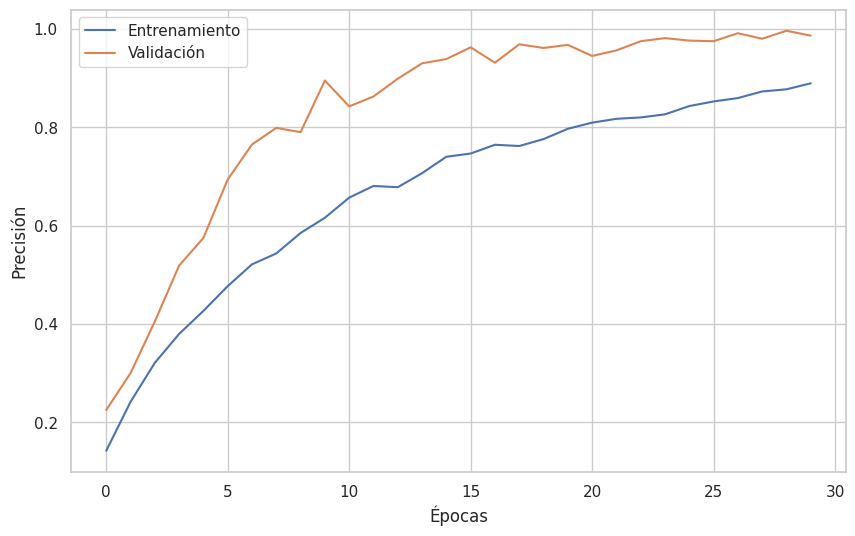

In [52]:
plt.plot(history.history['accuracy'], label = 'Entrenamiento')
plt.plot(history.history['val_accuracy'], label = 'Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

### Let's verify if we can trust this model:

In [53]:
y_pred2 = model_2.predict(X_test2)
y_pred_classes = np.argmax(y_pred2, axis=1)
y_true_classes = np.argmax(y_test2, axis=1)

print(classification_report(y_true_classes, y_pred_classes))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        94
           1       1.00      0.90      0.95        99
           2       1.00      1.00      1.00        97
           3       1.00      1.00      1.00       101
           4       1.00      1.00      1.00        99
           5       1.00      1.00      1.00        97
           6       1.00      1.00      1.00       102
           7       0.99      0.99      0.99       104
           8       0.99      0.99      0.99       102
           9       1.00      1.00      1.00       105

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



### Let's compare accuracy in trainning and testing:

In [54]:
loss, accuracy = model_2.evaluate(X_train2, y_train2)
print(f'Trainning accuracy: {accuracy:.4f}')

loss, accuracy = model_2.evaluate(X_test2, y_test2)
print(f'Testing accuracy: {accuracy:.4f}')

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9982 - loss: 0.0819
Trainning accuracy: 0.9955
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9848 - loss: 0.1196
Testing accuracy: 0.9880


# Conclusion:
### In both cases we got excellent results. At the beginning, we could suspect aboub overfitting. We could verify that these models are reliable, and we could avoid overfitting as well. They produced those results due to the original dataset didn't have NaN values, and maybe for the future, we'll need more observations (we only had 5000 observations).